# PART 1: STATISTICAL FORECAST

## 1. Import libraries and create demand array

In [4]:
#import libraries
import numpy as np
import pandas as pd

#create the demand array
demand = np.random.randint(low= 100, high=300, size=36, dtype=int)
print(demand)

[250 233 109 269 144 213 192 198 227 138 243 161 268 189 283 232 282 121
 201 231 289 214 169 206 107 214 176 137 242 187 168 231 150 174 228 224]


## 2. Forecasting KPIs

In [6]:
def KPI(df):
    print("Forecast KPIs are as below:")
    
    #calculate some average values
    avg_error = df["Error"].mean()
    avg_demand = df["Demand"].mean()
    
    #bias
    bias = avg_error
    print("Bias value is {:.2f}".format(bias))
    print("Bias% value is {:.2%}".format(bias/avg_demand))

    #MAD - Mean Absolute Deviation
    MAD = (df["Demand"]-avg_demand).abs().mean()
    print("MAD value is {:.2f}".format(MAD))
    print("MAD% value is {:.2%}".format(MAD/avg_demand))

    #MAE - Mean Absolute Error
    MAE = df["Error"].abs().mean()
    print("MAE value is {:.2f}".format(MAE))
    print("MAE% value is {:.2%}".format(MAE/avg_demand))

    #MAPE - Mean Absolute Percentage Error
    MAPE = (df["Error"]/df["Demand"]).abs().mean()
    print("MAPE value is {:.2%}".format(MAPE))

    #MSE - Mean Square Error
    MSE = (df["Error"]**2).mean()
    print("MSE value is {:.2f}".format(MSE))

    #RMSE - Root Mean Square Error
    RMSE = MSE**(1/2)
    print("RMSE value is {:.2f}".format(RMSE))
    print("RMSE% value is {:.2%}".format(RMSE/avg_demand))

## 3. Moving Average

In [8]:
def moving_average(demand):

    #create the forecast array
    forecast = np.full(len(demand),np.NaN)

    #determine the forecast period
    fcst_period = int(input("Please input the forecast period"))

    #determine the average period
    avg_period = int(input("Please input the average period"))

    #update the demand array
    demand = np.append(demand, fcst_period*np.NaN)

    #update the forecast array
    forecast = np.append(forecast,fcst_period*np.NaN)

    #caculate the forecast
    for i in range (avg_period,len(demand)):
        forecast[i] = np.mean(demand[i-avg_period:i])

    #visualize the data
    df = pd.DataFrame({'Demand':demand,'Forecast':forecast,'Error':demand - forecast})
    df.plot()

    KPI(df)

Please input the forecast period 1
Please input the average period 3


Forecast KPIs are as below:
Bias value is 2.62
Bias% value is 1.29%
MAD value is 40.35
MAD% value is 19.90%
MAE value is 45.26
MAE% value is 22.32%
MAPE value is 24.52%
MSE value is 3052.02
RMSE value is 55.25
RMSE% value is 27.24%


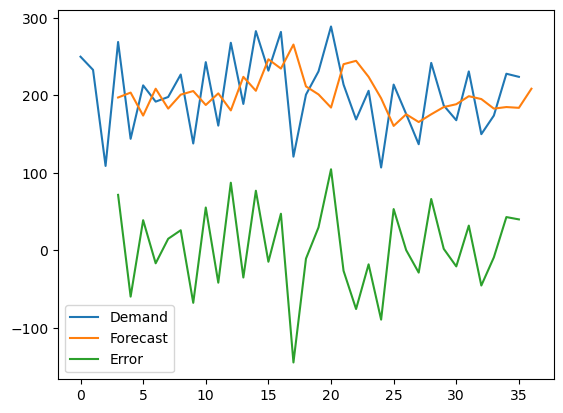

In [9]:
moving_average(demand)

## 4. Simple Exponential Smoothing

In [11]:
def simple_exponential_smoothing(demand):

    #create forecast array
    forecast = np.full(len(demand),np.NaN)

    #determine the forecast period
    fcst_period = int(input("Please input the forecast period"))

    #update demand and forecast array
    demand = np.append(demand,fcst_period*np.NaN)
    forecast = np.append(forecast,fcst_period*np.NaN)

    #create the alpha parameter
    alpha = float(input("Please input the alpha parameter"))

    #initiate first forecast
    forecast[0] = demand[0]

    #calculate other forecast
    for i in range (1,len(forecast)):
        forecast[i] = alpha*demand[i-1]+(1-alpha)*forecast[i-1]

    df = pd.DataFrame.from_dict({'Demand': demand, 'Forecast':forecast,'Error':demand - forecast})
    df.plot()

    KPI(df)

Please input the forecast period 1
Please input the alpha parameter 0.6


Forecast KPIs are as below:
Bias value is -1.53
Bias% value is -0.75%
MAD value is 40.35
MAD% value is 19.90%
MAE value is 50.60
MAE% value is 24.95%
MAPE value is 28.80%
MSE value is 3833.74
RMSE value is 61.92
RMSE% value is 30.53%


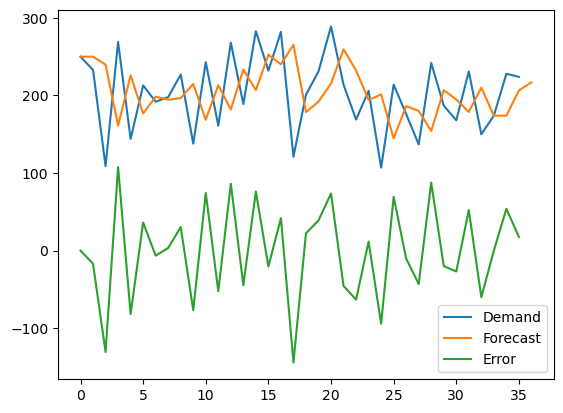

In [12]:
simple_exponential_smoothing(demand)

## 5. Double Exponential Smoothing

In [14]:
def double_exp_smoothing(demand):
    #create forecast, level, trend array
    forecast = np.full(len(demand),np.NaN)
    level = np.full(len(demand),np.NaN)
    trend = np.full(len(demand),np.NaN)

    #determine the forecast period
    fcst_period = int(input("Please input the forecast period"))

    #update demand, forecast, level and trend array
    demand = np.append(demand,fcst_period*np.NaN)
    forecast = np.append(forecast,fcst_period*np.NaN)
    level = np.append(level,fcst_period*np.NaN)
    trend = np.append(trend,fcst_period*np.NaN)

    #create the alpha & beta parameter
    alpha = float(input("Please input the alpha parameter"))
    beta = float(input("Please input the beta parameter"))

    #intiate first forecast
    level[0] = demand[0]
    trend[0] = demand[1]-demand[0]
    forecast[0] = demand[0]
    forecast[1] = level[0] + trend[0]

    #calculate the rest
    for i in range (2,len(forecast)):
        level[i-1] = alpha*demand[i-1]+(1-alpha)*(level[i-2]+trend[i-2])
        trend[i-1] = beta*(level[i-1]-level[i-2])+(1-beta)*trend[i-2]
        forecast[i] = level[i-1]+trend[i-1]
        
    df = pd.DataFrame.from_dict({'Demand': demand, 'Forecast':forecast, "Error":demand-forecast})
    df.plot()

    KPI(df)

Please input the forecast period 1
Please input the alpha parameter 0.6
Please input the beta parameter 0.4


Forecast KPIs are as below:
Bias value is 3.27
Bias% value is 1.61%
MAD value is 40.35
MAD% value is 19.90%
MAE value is 56.67
MAE% value is 27.95%
MAPE value is 31.29%
MSE value is 4807.43
RMSE value is 69.34
RMSE% value is 34.19%


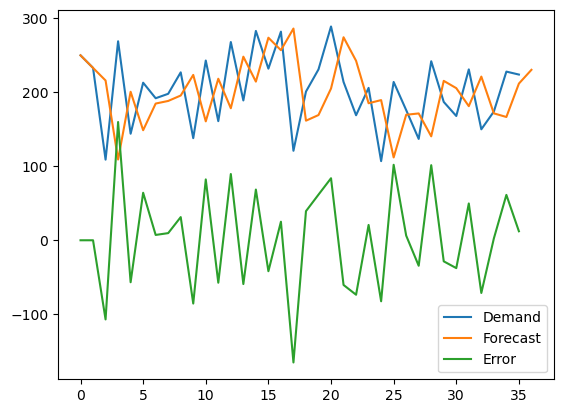

In [15]:
double_exp_smoothing(demand)

## 6. Double Exponential Smoothing With Damped Trend

In [17]:
def double_exp_smoothing_with_damped_trend(demand):
    #create forecast, level, trend array
    forecast = np.full(len(demand),np.NaN)
    level = np.full(len(demand),np.NaN)
    trend = np.full(len(demand),np.NaN)

    #determine the forecast period
    fcst_period = int(input("Please input the forecast period"))

    #update demand, forecast, level and trend array
    demand = np.append(demand,fcst_period*np.NaN)
    forecast = np.append(forecast,fcst_period*np.NaN)
    level = np.append(level,fcst_period*np.NaN)
    trend = np.append(trend,fcst_period*np.NaN)

    #create the alpha & beta parameter
    alpha = float(input("Please input the alpha parameter"))
    beta = float(input("Please input the beta parameter"))
    phi = float(input("Please input the phi parameter"))

    #intiate first forecast
    level[0] = demand[0]
    trend[0] = demand[1]-demand[0]
    forecast[0] = demand[0]
    forecast[1] = level[0] + trend[0]

    #calculate the rest
    for i in range (2,len(forecast)):
        level[i-1] = alpha*demand[i-1]+(1-alpha)*(level[i-2]+phi*trend[i-2])
        trend[i-1] = beta*(level[i-1]-level[i-2])+(1-beta)*phi*trend[i-2]
        forecast[i] = level[i-1]+trend[i-1]
        
    df = pd.DataFrame.from_dict({'Demand': demand, 'Forecast':forecast, "Error":demand-forecast})
    df.plot()

    KPI(df)

Please input the forecast period 1
Please input the alpha parameter 0.6
Please input the beta parameter 0.4
Please input the phi parameter 0.8


Forecast KPIs are as below:
Bias value is 1.85
Bias% value is 0.91%
MAD value is 40.35
MAD% value is 19.90%
MAE value is 56.68
MAE% value is 27.95%
MAPE value is 31.43%
MSE value is 4751.95
RMSE value is 68.93
RMSE% value is 34.00%


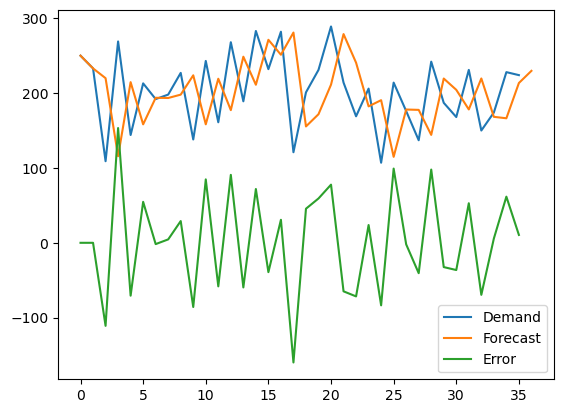

In [18]:
double_exp_smoothing_with_damped_trend(demand)

## 7. Triple Exponential Smoothing With Damped Trend

In [20]:
def tri_exp_smoothing_with_damped_trend(demand):
    #create forecast, level, trend, season array
    forecast = np.full(len(demand),np.NaN)
    level = np.full(len(demand),np.NaN)
    trend = np.full(len(demand),np.NaN)
    season = np.full(len(demand),np.NaN)

    #determine the season length
    season_length = int(input("Please input the season length"))
    
    #calculate average monthly demand
    average_monthly_demand = (demand[:].sum())/(demand.shape[0])

    #calculate average each month demand
    average_each_month_demand = np.full(season_length,np.NaN)

    #calculate seasonal index for first cycle
    for i in range(0,season_length):
        average_each_month_demand[i]=demand[i:len(demand):season_length].mean()
        season[i]=average_each_month_demand[i]/average_monthly_demand
    
    #determine the forecast period
    fcst_period = int(input("Please input the forecast period"))

    #update demand, forecast, level and trend array
    demand = np.append(demand,fcst_period*np.NaN)
    forecast = np.append(forecast,fcst_period*np.NaN)
    level = np.append(level,fcst_period*np.NaN)
    trend = np.append(trend,fcst_period*np.NaN)
    season = np.append(season,fcst_period*np.NaN)

    #create the alpha, beta, phi, gamma parameter
    alpha = float(input("Please input the alpha parameter"))
    beta = float(input("Please input the beta parameter"))
    phi = float(input("Please input the phi parameter"))
    gamma = float(input("Please input the gamma parameter"))

    #forecast initiate
    forecast[0]=demand[0]
    level[0]=demand[0]/season[0]
    trend[0]=demand[1]/season[1]-demand[0]/season[0]
    
    #forecast for the first cycle
    for i in range (1,season_length):
        forecast[i]=(level[i-1]+phi*trend[i-1])*season[i]
        level[i]=alpha*demand[i]/season[i]+(1-alpha)*(level[i-1]+phi*trend[i-1])
        trend[i]=beta*(level[i]-level[i-1])+(1-beta)*phi*trend[i-1]
    #forecast for the rest cycle
    for i in range (season_length,len(demand)):
        forecast[i]=(level[i-1]+phi*trend[i-1])*season[i-season_length]
        level[i]=alpha*demand[i]/season[i-season_length]+(1-alpha)*(level[i-1]+phi*trend[i-1])
        trend[i]=beta*(level[i]-level[i-1])+(1-beta)*phi*trend[i-1]
        season[i]=gamma*demand[i]/level[i]+(1-alpha)*season[i-season_length]

    df = pd.DataFrame.from_dict({"Demand":demand,"Forecast":forecast,"Error":demand-forecast})
    df.plot()
    KPI(df)

Please input the season length 12
Please input the forecast period 1
Please input the alpha parameter 0.6
Please input the beta parameter 0.4
Please input the phi parameter 0.8
Please input the gamma parameter 0.5


Forecast KPIs are as below:
Bias value is 1.32
Bias% value is 0.65%
MAD value is 40.35
MAD% value is 19.90%
MAE value is 53.39
MAE% value is 26.33%
MAPE value is 29.53%
MSE value is 4148.39
RMSE value is 64.41
RMSE% value is 31.76%


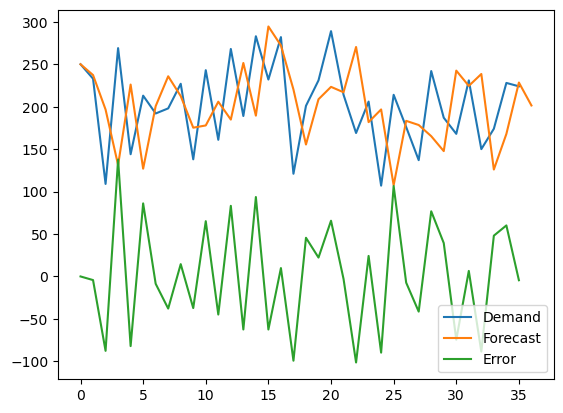

In [21]:
tri_exp_smoothing_with_damped_trend(demand)